In [6]:
import numpy as np
import scipy.optimize as sp
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [7]:
theta1 = np.linspace(0, 80, 9)
thetam = np.array([0.0, 3.5, 7.0, 10.5, 12.5, 17.5, 23.0, 30.0, 41.5])

# Convert into radians
theta1 = theta1 * np.pi/180
thetam = thetam * np.pi/180

# Calculate real angle
theta2 = theta1 - thetam

In [62]:
# Uncertainties
theta1_err = abs(np.cos(theta1 + 0.5) * np.pi/180)
theta2_err = abs(np.cos(theta2+ 0.5) * np.pi/180)

The index of refraction for the glass is 1.4783 plusminus 0.0078


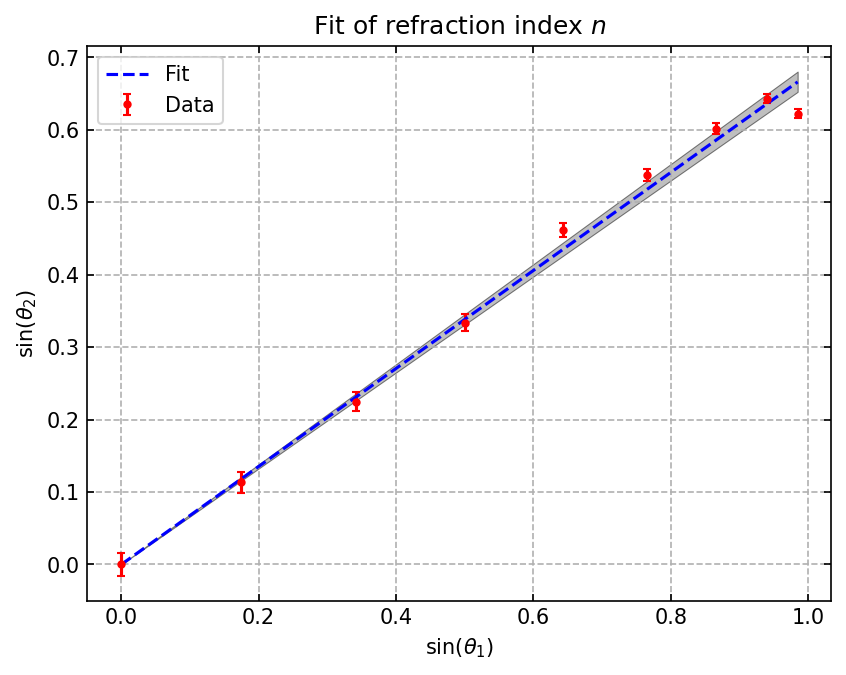

In [65]:
def n_fit(theta1, n):
    return theta1 / n

n_guess = 2

p_opt, p_cov = sp.curve_fit(n_fit, np.sin(theta1), np.sin(theta2), sigma = thetam_err, absolute_sigma = True, p0 = n_guess)

fig, ax = plt.subplots()
# ax.plot(np.sin(theta1), np.sin(theta2), 'o', label='Data', color = 'tab:red')  # Plotting theta1 vs theta2
ax.errorbar(np.sin(theta1), np.sin(theta2), yerr = theta2_err, fmt = 'o', capsize = 2, color = 'red', markersize = 3, label = 'Data')
ax.plot(np.sin(theta1), n_fit(np.sin(theta1), p_opt[0]), '--', color= 'blue', label='Fit')  # Plotting the fit curve
ax.fill_between(np.sin(theta1), n_fit(np.sin(theta1), p_opt[0] - 4*np.sqrt(p_cov[0][0])), n_fit(np.sin(theta1), p_opt[0] + 4* np.sqrt(p_cov[0][0])), 
                color = 'grey', alpha = 0.5, edgecolor = 'k', linewidth = 0.5)
ax.set_xlabel(r'$\sin(\theta_1)$')
ax.set_ylabel(r'$\sin(\theta_2)$')
ax.grid(ls='--')
ax.set_title(r'Fit of refraction index $n$')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)

print('The index of refraction for the glass is %s plusminus %s' % (round(p_opt[0], 4), round(np.sqrt(p_cov[0][0]), 4)))
plt.show()
